In [40]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_directory = 'C:\\Users\\Matheus\\.keras\\datasets\\manga'
tf.random.set_seed(42) 

In [41]:

# create new pictures

""" color_dir = data_directory
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
)
dir_It = datagen.flow_from_directory(
    color_dir,
    batch_size=32,
    save_to_dir=data_directory+"\\argurmented",
    save_prefix="",
    save_format='png',
)
for _ in range(5):
    img, label = dir_It.next() """
   




' color_dir = data_directory\ndatagen = tf.keras.preprocessing.image.ImageDataGenerator(\n    rescale=1./255,\n    rotation_range=180,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n)\ndir_It = datagen.flow_from_directory(\n    color_dir,\n    batch_size=32,\n    save_to_dir=data_directory+"\\argurmented",\n    save_prefix="",\n    save_format=\'png\',\n)\nfor _ in range(5):\n    img, label = dir_It.next() '

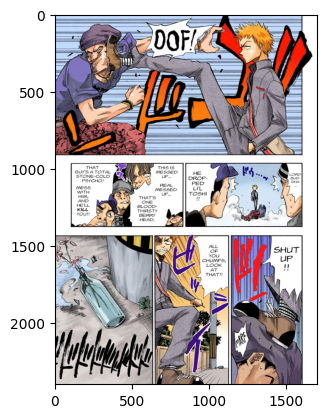

In [60]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


# read one img
""" data = plt.imread(data_directory + "\\test\\output\\22673-12227-009.jpg") """

#show one img
""" plt.imshow(np.array(data, dtype=int))
plt.show() """

# resize data if necessary
""" d=tf.image.resize(
    images=data,
    size=[700,700],
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
) """




